In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import matplotlib.font_manager
import pandas as pd

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("spark-sql").getOrCreate()

In [3]:
directory = "/home/hslee/project_2/data"

mango_category_sdf = spark.read.csv(f"file:///home/hslee/project_2/mango_category.csv", header=True, inferSchema=True)

In [4]:
directory = "/home/hslee/project_2/data"

filename_mango_review = "mango_review.csv"
filename_mango_restaurant = "mango_restaurant.csv"

filename_naver_review = "naver_review.csv"
filename_naver_restaurant = "naver_restaurant.csv"

filename_naver_review = "naver_review.csv"
filename_naver_restaurant = "naver_restaurant.csv"

filename_google_review = "google_review.csv"
filename_google_restaurant = "google_restaurant.csv"

filename_insta_post = "insta_post.csv"
filename_insta_restaurant = "insta_restaurant.csv"

In [5]:
mango_review_sdf = spark.read.csv(f"file:///{directory}/{filename_mango_review}", header=True, inferSchema=True)
mango_restaurant_sdf = spark.read.csv(f"file:///{directory}/{filename_mango_restaurant}", header=True, inferSchema=True)

naver_review_sdf = spark.read.csv(f"file:///{directory}/{filename_naver_review}", header=True, inferSchema=True)
naver_restaurant_sdf = spark.read.csv(f"file:///{directory}/{filename_naver_restaurant}", header=True, inferSchema=True)

google_review_sdf = spark.read.csv(f"file:///{directory}/{filename_google_review}", header=True, inferSchema=True)
google_restaurant_sdf = spark.read.csv(f"file:///{directory}/{filename_google_restaurant}", header=True, inferSchema=True)

insta_post_sdf = spark.read.csv(f"file:///{directory}/{filename_insta_post}", header=True, inferSchema=True)
insta_restaurant_sdf = spark.read.csv(f"file:///{directory}/{filename_insta_restaurant}", header=True, inferSchema=True)

In [6]:
mango_review_sdf.show(5)
mango_review_sdf.createOrReplaceTempView("mango_review")

+----------------------------------+------------------------------+----------------------------+----------+
|                               _c0|                            id|                      review|evaluation|
+----------------------------------+------------------------------+----------------------------+----------+
|                                 0|                           101|강동에 위치한 타이음식 맛집.|      null|
|  근처에 잠깐 올 일이 있어 왔다...|                          null|                        null|      null|
|                   리뷰들을 보니 3| 4년 전에 한 번 홀릭들 사이...|                        null|      null|
| 와이프가 태국음식을 좋아해 한 ...|                          null|                        null|      null|
|우럭튀김이 있어 시켜보려고 했지...|                          null|                        null|      null|
+----------------------------------+------------------------------+----------------------------+----------+
only showing top 5 rows



22/06/18 21:30:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, review, evaluation
 Schema: _c0, id, review, evaluation
Expected: _c0 but found: 
CSV file: file:///home/hslee/project_2/data/mango_review.csv


In [7]:
mango_restaurant_sdf.show(5) 
mango_restaurant_sdf.createOrReplaceTempView("mango_restaurant")

+---+---+------------+------+-------------+------+------+--------+---------------------------------+---------------------------------+---------------+---------------+--------------+
|_c0| id|        name|region|     category|rating|  hits|bookmark|                     road_address|                     land_address|evaluation_nice|evaluation_soso|evaluation_bad|
+---+---+------------+------+-------------+------+------+--------+---------------------------------+---------------------------------+---------------+---------------+--------------+
|  0|101|      보타이|강동구|    태국 음식|   4.4|114664|    2256|  서울특별시 강동구 풍성로 90 ...|    서울시 강동구 성내동 111-5...|             65|             11|             9|
|  1|102|    얌얌카츠|강동구|    까스 요리|   4.4| 29671|     727|  서울특별시 강동구 천호옛14길 22|        서울시 강동구 성내동 30-1|             22|              4|             1|
|  2|103|신흥정육식당|강동구|    고기 요리|   4.4|  5445|     137|서울특별시 강동구 양재대로89길 16|       서울시 강동구 성내동 428-2|             10|              1|             0|
|  3|

22/06/18 21:30:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, name, region, category, rating, hits, bookmark, road_address, land_address, evaluation_nice, evaluation_soso, evaluation_bad
 Schema: _c0, id, name, region, category, rating, hits, bookmark, road_address, land_address, evaluation_nice, evaluation_soso, evaluation_bad
Expected: _c0 but found: 
CSV file: file:///home/hslee/project_2/data/mango_restaurant.csv


In [8]:
naver_review_sdf.show(5)
naver_review_sdf.createOrReplaceTempView("naver_review")

+----------------------------------+----+---------------------------------+
|                               _c0|  id|                           review|
+----------------------------------+----+---------------------------------+
|                                 0| 148|건대에서 가성비와 맛이 정말 좋...|
|        육성회비에서 다녀 왔습니다|null|                             null|
| 친구와 2차로 방문한곳인데 건대...|null|                             null|
| 다소 떨어진 위치에 있어 친구와...|null|                             null|
|할 수 있겠다고 생각했는데 반전이..|null|                             null|
+----------------------------------+----+---------------------------------+
only showing top 5 rows



22/06/18 21:30:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, review
 Schema: _c0, id, review
Expected: _c0 but found: 
CSV file: file:///home/hslee/project_2/data/naver_review.csv


In [9]:
naver_restaurant_sdf.show(5)
naver_restaurant_sdf.createOrReplaceTempView("naver_restaurant")

22/06/18 21:30:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, name, category, rating, address
 Schema: _c0, id, name, category, rating, address
Expected: _c0 but found: 
CSV file: file:///home/hslee/project_2/data/naver_restaurant.csv


+---+---+------------+-------------+------+-------------------------------+
|_c0| id|        name|     category|rating|                        address|
+---+---+------------+-------------+------+-------------------------------+
|  0|101|      보타이|     태국음식|  4.47|서울 강동구 풍성로 90 한스빌...|
|  1|102|    얌얌카츠|       돈가스|  4.65|  서울 강동구 천호옛14길 22 1층|
|  2|103|신흥정육식당|     정육식당|  4.31| 서울 강동구 양재대로89길 16...|
|  3|104|  커피몽타주|         카페|  4.67| 서울 강동구 올림픽로48길 23...|
|  4|105|        다람|육류,고기요리|   4.4|    서울 강동구 양재대로85길 29|
+---+---+------------+-------------+------+-------------------------------+
only showing top 5 rows



In [10]:
google_review_sdf.show(5)
google_review_sdf.createOrReplaceTempView("google_review")

+----------------------------------+----+---------------------------------+
|                               _c0|  id|                           review|
+----------------------------------+----+---------------------------------+
|                                 0| 148|건대에서 가성비와 맛이 정말 좋...|
|        육성회비에서 다녀 왔습니다|null|                             null|
| 친구와 2차로 방문한곳인데 건대...|null|                             null|
| 다소 떨어진 위치에 있어 친구와...|null|                             null|
|할 수 있겠다고 생각했는데 반전이..|null|                             null|
+----------------------------------+----+---------------------------------+
only showing top 5 rows



22/06/18 21:30:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, review
 Schema: _c0, id, review
Expected: _c0 but found: 
CSV file: file:///home/hslee/project_2/data/google_review.csv


In [11]:
google_restaurant_sdf.show(5)
google_restaurant_sdf.createOrReplaceTempView("google_restaurant")

+---+---+------------+---------------------+------+---------------------------------+
|_c0| id|        name|             category|rating|                          address|
+---+---+------------+---------------------+------+---------------------------------+
|  0|101|      보타이|          태국 음식점|   4.3|      서울특별시 강동구 풍성로 90|
|  1|102|    얌얌카츠|      돈까스 전문식당|   4.7| 서울특별시 강동구 천호옛14길 ...|
|  2|103|신흥정육식당|               음식점|   4.4|서울특별시 강동구 양재대로89길...|
|  3|104|  커피몽타주|                 카페|   4.5|서울특별시 강동구 올림픽로48길...|
|  4|105|        다람|숯불구이/바베큐전문점|   4.5|    서울특별시 강동구 성내3동 443|
+---+---+------------+---------------------+------+---------------------------------+
only showing top 5 rows



22/06/18 21:30:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, name, category, rating, address
 Schema: _c0, id, name, category, rating, address
Expected: _c0 but found: 
CSV file: file:///home/hslee/project_2/data/google_restaurant.csv


In [12]:
insta_post_sdf.show(5)
insta_post_sdf.createOrReplaceTempView("insta_post")

+---+---+------+---------------------------------+--------------------+-----+
|_c0| id|  name|                          content|                tags|likes|
+---+---+------+---------------------------------+--------------------+-----+
|  0|101|보타이|이전에 맞춤 제작해드렸던 일이 ...|[kfashion handmad...| null|
|  1|101|보타이|6월 신상부터는 같이 제공드리고...|        [릴레노벨라]| null|
|  2|101|보타이|           Store Updated! 미리...|        [릴레노벨라]| null|
|  3|101|보타이|            Store Updated! 6월...|        [릴레노벨라]| null|
|  4|101|보타이|            Store Updated! 6월...|        [릴레노벨라]| null|
+---+---+------+---------------------------------+--------------------+-----+
only showing top 5 rows



22/06/18 21:30:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, name, content, tags, likes
 Schema: _c0, id, name, content, tags, likes
Expected: _c0 but found: 
CSV file: file:///home/hslee/project_2/data/insta_post.csv


In [13]:
insta_restaurant_sdf.show(5)
insta_restaurant_sdf.createOrReplaceTempView("insta_restaurant")

+---+---+------------+--------+
|_c0| id|        name|post_cnt|
+---+---+------------+--------+
|  0|101|      보타이|    2540|
|  1|102|    얌얌카츠|   30722|
|  2|103|신흥정육식당|     734|
|  3|104|  커피몽타주|    2493|
|  4|105|        다람|   13661|
+---+---+------------+--------+
only showing top 5 rows



22/06/18 21:30:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , id, name, post_cnt
 Schema: _c0, id, name, post_cnt
Expected: _c0 but found: 
CSV file: file:///home/hslee/project_2/data/insta_restaurant.csv


## 테이블 리스트
- mango_review_sdf, mango_restaurant_sdf
- naver_review_sdf, naver_restaurant_sdf
- google_review_sdf, google_restaurant_sdf
- insta_post_sdf, insta_restaurant_sdf

## 망고 플레이트

### 망고 상위

In [14]:
# 망고 식당 상위 20개

query = """
SELECT id, name, rating, road_address,
CASE WHEN category = "카페 / 디저트" THEN "디저트"
     WHEN category = "베이커리" THEN "디저트"
     WHEN category = "까스 요리" THEN "일식"
     WHEN category = "회 / 스시" THEN "일식"
     WHEN category = "이자카야 / 오뎅 / 꼬치" THEN "일식"
     WHEN category = "돈부리 / 일본 카레 / 벤토" THEN "일식"
     WHEN category = "정통 일식 / 일반 일식" THEN "일식"
     WHEN category = "한정식 / 백반 / 정통 한식" THEN "한식"
     WHEN category = "고기 요리" THEN "한식"
     WHEN category = "철판 요리" THEN "일식"
     WHEN category = "세계음식 기타" THEN "양식"
     WHEN category = "기타 양식" THEN "양식"
     WHEN category = "프랑스 음식" THEN "양식"
     WHEN category = "이탈리안" THEN "양식"
     WHEN category = "스테이크 / 바베큐" THEN "양식"
     WHEN category = "칵테일 / 와인" THEN "바(BAR)"
     WHEN category = "브런치 / 버거 / 샌드위치" THEN "양식"
     WHEN category = "정통 중식 / 일반 중식" THEN "중식"
     WHEN category = "딤섬 / 만두" THEN "중식"
     WHEN category = "기타 중식" THEN "중식"
     WHEN category = "탕 / 찌개 / 전골" THEN "한식"
     WHEN category = "퓨전 한식" THEN "한식"
     WHEN category = "퓨전 양식" THEN "양식"
     WHEN category = "뷔페" THEN "양식"
     WHEN category = "기타 한식" THEN "한식"
     WHEN category = "닭 / 오리 요리" THEN "한식"
     WHEN category = "기타 일식" THEN "일식"
     WHEN category = "일반 주점" THEN "일식"
     WHEN category = "라멘 / 소바 / 우동" THEN "일식"
     WHEN category = "국수 / 면 요리" THEN "한식"
     WHEN category = "해산물 요리" THEN "한식"
     
     
     ELSE category
     END AS category
FROM mango_restaurant

ORDER BY rating DESC
"""

spark.sql(query).show()
mango_category_df = spark.sql(query)


+---+------------------------+------+----------------------------------+--------+
| id|                    name|rating|                      road_address|category|
+---+------------------------+------+----------------------------------+--------+
|131|따빠디또 디저트 따빠스바|   4.8|   서울특별시 관악구 행운1길 40...|  디저트|
|202|                  오제제|   4.8|   서울특별시 중구 세종대로 136 B3|    일식|
|261|              작은피자집|   4.8|   서울특별시 동작구 사당로30길 96|    양식|
|192|                    호반|   4.8| 서울특별시 종로구 삼일대로26길 20|    한식|
|271|                  쉐시몽|   4.8| 서울특별시 마포구 월드컵로10길...|    양식|
|272|          카와카츠오토코|   4.8|   서울특별시 마포구 양화로 78-...|    일식|
|201|                회현식당|   4.8|     서울특별시 중구 퇴계로2길 9-8|    일식|
|273|                  파델라|   4.8|  서울특별시 마포구 연남로1길 1...|    양식|
|274|                    로랑|   4.8|   서울특별시 마포구 성지1길 15 1F|    일식|
|191|                  만가타|   4.8|  서울특별시 종로구 삼청로2길 40-5|    양식|
|141|    오코노미야키식당하나|   4.7|  서울특별시 광진구 능동로13길 111|    일식|
|203|            나인스게이트|   4.7|    서울특별시 중구 소공로 106 ...| 

In [15]:
mango_category_df.createOrReplaceTempView("mango_category")

In [16]:
query = """
SELECT category, COUNT(*) AS CNT
FROM mango_category
GROUP BY category
ORDER BY CNT DESC
"""
spark.sql(query).show()


+---------+---+
| category|CNT|
+---------+---+
|     한식| 54|
|     일식| 45|
|   디저트| 27|
|     중식| 24|
|     양식| 23|
|태국 음식|  3|
|남미 음식|  3|
|  바(BAR)|  1|
+---------+---+



In [115]:
category_df = spark.sql(query).toPandas()

In [116]:
category_df.to_csv("category_df.csv")

In [ ]:
directory = "/home/hslee/project_2/data"

mango_category_sdf = spark.read.csv(f"file:///home/hslee/project_2/mango_category.csv", header=True, inferSchema=True)

In [72]:
qeury = """
SELECT category
FROM mango_category
"""

spark.sql(query).show

<bound method DataFrame.show of DataFrame[id: int, name: string, rating: double, road_address: string, category: string]>

In [40]:
# 망고 식당 상위 20개

query = """
SELECT id, name, rating,category
FROM mango_restaurant
WHERE category = "일반 주점"
ORDER BY rating ASC
LIMIT 20; 
"""

spark.sql(query).show()
mango_restaurant_df = spark.sql(query)

+---+---------------+------+---------+
| id|           name|rating| category|
+---+---------------+------+---------+
|189|참새식당 스즈메|   4.2|일반 주점|
+---+---------------+------+---------+



In [41]:
query = """
SELECT id, name, rating, road_address, 
CASE WHEN category = "카페 / 디저트" THEN "디저트"
     WHEN category = "회 / 스시" THEN "일식"
     WHEN category = "이자카야 / 오뎅 / 꼬치" THEN "일식"
     WHEN category = "돈부리 / 일본 카레 / 벤토" THEN "일식"
     WHEN category = "정통 일식 / 일반 일식" THEN "일식"
     WHEN category = "한정식 / 백반 / 정통 한식" THEN "한식"
     WHEN category = "철판 요리" THEN "일식"
     WHEN category = "세계음식 기타" THEN "양식"
     WHEN category = "기타 양식" THEN "양식"
     WHEN category = "프랑스 음식" THEN "양식"
     WHEN category = "이탈리안" THEN "양식"
     WHEN category = "스테이크 / 바베큐" THEN "양식"
     WHEN category = "칵테일 / 와인" THEN "바(BAR)"
     WHEN category = "카페 / 디저트" THEN "디저트"
     WHEN category = "베이커리" THEN "디저트"
     WHEN category = "까스 요리" THEN "일식"
     WHEN category = "회 / 스시" THEN "일식"
     WHEN category = "이자카야 / 오뎅 / 꼬치" THEN "일식"
     WHEN category = "돈부리 / 일본 카레 / 벤토" THEN "일식"
     WHEN category = "정통 일식 / 일반 일식" THEN "일식"
     WHEN category = "일반 주점" THEN "일식"
     WHEN category = "한정식 / 백반 / 정통 한식" THEN "한식"
     WHEN category = "고기 요리" THEN "한식"
     WHEN category = "기타 한식" THEN "한식"
     WHEN category = "국수 / 면 요리" THEN "한식"
     WHEN category = "닭 / 오리 요리" THEN "한식"
     WHEN category = "탕 / 찌개 / 전골" THEN "한식"
     WHEN category = "기타 양식" THEN "양식"
     WHEN category = "프랑스 음식" THEN "양식"
     WHEN category = "이탈리안" THEN "양식"
     WHEN category = "스테이크 / 바베큐" THEN "양식"
     WHEN category = "정통 중식 / 일반 중식" THEN "중식"
     ELSE category
     END AS category
FROM mango_restaurant
ORDER BY rating ASC
LIMIT 20;
"""

spark.sql(query).show()
mango_restaurant_df = spark.sql(query)

+---+------------------+------+----------------------------------+---------+
| id|              name|rating|                      road_address| category|
+---+------------------+------+----------------------------------+---------+
|220|        파크더블유|   3.3| 서울특별시 중랑구 양원역로16길...|   디저트|
|219|      홍이네떡볶이|   3.5|   서울특별시 중랑구 망우로73길 26|     한식|
|230|            춘천옥|   3.6| 서울특별시 금천구 디지털로12길...|     한식|
|160|        빈브라더스|   3.7|   서울특별시 구로구 경인로 662...|   디저트|
|229|          인크커피|   3.7|서울특별시 금천구 가산디지털2로...|   디저트|
|157|          평양냉면|   3.8|   서울특별시 구로구 고척로10길 65|     한식|
|158|   신도림 이도식당|   3.8|   서울특별시 구로구 경인로 661...|     한식|
|159|      신도림참족발|   3.8|   서울특별시 구로구 경인로 661...|     한식|
|218|            한참치|   3.8|   서울특별시 중랑구 공릉로 32 ...|     일식|
|155|  이스트바이게이트|   3.9|   서울특별시 구로구 경인로 662...|태국 음식|
|156|        상하이포차|   3.9|      서울특별시 구로구 새말로 102|     중식|
|227|        카페스미다|   3.9|   서울특별시 금천구 벚꽃로 298...|   디저트|
|228|            호세가|   3.9| 서울특별시 금천구 남부순환로10...|남미 음식|
|215|      가고파설렁탕|  

In [62]:
# 망고플레이트 상위 20개
# 일식이 가장 많음

In [16]:
new_df = mango_restaurant_df.groupBy("category").count().orderBy("count", ascending=False)
mango_top_20 = new_df.select("*").toPandas()

In [17]:
mango_top_20

,category,count
0,일식,10
1,양식,5
2,디저트,2
3,한식,2
4,바(BAR),1


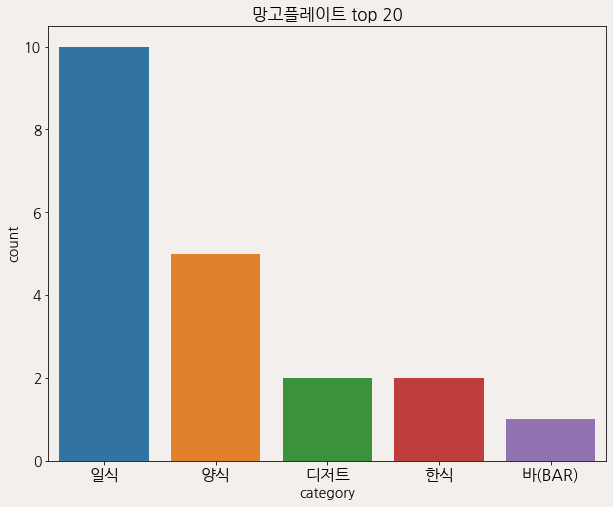

In [64]:
plt.rcParams['figure.facecolor'] = '#F3EFEC'
plt.rcParams['axes.facecolor'] = '#F3EFEC'
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['font.size'] = 14



plt.figure(figsize=(10,8))
plt.title("망고플레이트 top 20")
sns.barplot(x=mango_top_20["category"], y=mango_top_20["count"])
plt.xticks(fontsize=16)
plt.show()



In [61]:
# 망고 식당 하위 20개

query = """
SELECT id, name, rating,
CASE WHEN category = "카페 / 디저트" THEN "디저트"
     WHEN category = "베이커리" THEN "디저트"
     WHEN category = "까스 요리" THEN "일식"
     WHEN category = "회 / 스시" THEN "일식"
     WHEN category = "이자카야 / 오뎅 / 꼬치" THEN "일식"
     WHEN category = "돈부리 / 일본 카레 / 벤토" THEN "일식"
     WHEN category = "정통 일식 / 일반 일식" THEN "일식"
     WHEN category = "한정식 / 백반 / 정통 한식" THEN "한식"
     WHEN category = "고기 요리" THEN "한식"
     WHEN category = "기타 한식" THEN "한식"
     WHEN category = "국수 / 면 요리" THEN "한식"
     WHEN category = "닭 / 오리 요리" THEN "한식"
     WHEN category = "탕 / 찌개 / 전골" THEN "한식"
     WHEN category = "철판 요리" THEN "일식"
     WHEN category = "세계음식 기타" THEN "양식"
     WHEN category = "기타 양식" THEN "양식"
     WHEN category = "프랑스 음식" THEN "양식"
     WHEN category = "이탈리안" THEN "양식"
     WHEN category = "스테이크 / 바베큐" THEN "양식"
     WHEN category = "정통 중식 / 일반 중식" THEN "중식"
     ELSE category
     END AS category
FROM mango_restaurant
ORDER BY rating ASC
LIMIT 20;
"""

spark.sql(query).show()
temp = spark.sql(query).groupBy("category").count().orderBy("count", ascending=False)
mango_restaurant_bottom20_df = temp.select("*").toPandas()

+---+------------------+------+---------+
| id|              name|rating| category|
+---+------------------+------+---------+
|220|        파크더블유|   3.3|   디저트|
|219|      홍이네떡볶이|   3.5|     한식|
|230|            춘천옥|   3.6|     한식|
|160|        빈브라더스|   3.7|   디저트|
|229|          인크커피|   3.7|   디저트|
|157|          평양냉면|   3.8|     한식|
|158|   신도림 이도식당|   3.8|     한식|
|159|      신도림참족발|   3.8|     한식|
|218|            한참치|   3.8|     일식|
|155|  이스트바이게이트|   3.9|태국 음식|
|156|        상하이포차|   3.9|     중식|
|227|        카페스미다|   3.9|   디저트|
|228|            호세가|   3.9|남미 음식|
|215|      가고파설렁탕|   4.0|     한식|
|216|울타리철판곱창전문|   4.0|     한식|
|217|          함평국밥|   4.0|     한식|
|240|            돈부리|   4.0|     일식|
|225|          팔람까오|   4.0|태국 음식|
|119|        미즐카페엠|   4.0|   디저트|
|120|      다래함박스텍|   4.0|     양식|
+---+------------------+------+---------+



In [20]:
mango_restaurant_bottom20_df

,category,count
0,한식,8
1,디저트,5
2,일식,2
3,태국 음식,2
4,중식,1
5,남미 음식,1
6,양식,1


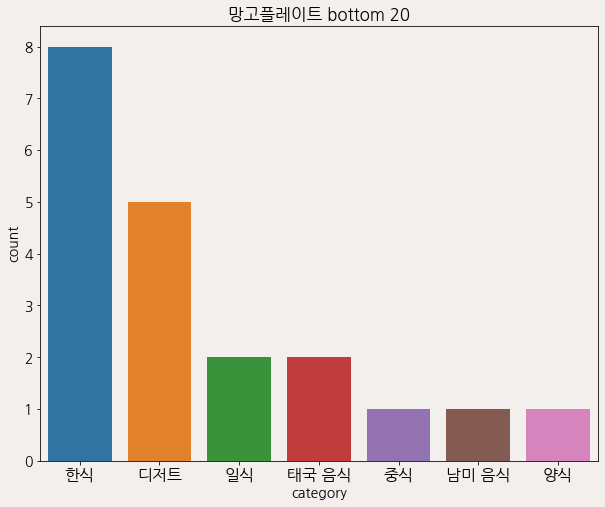

In [65]:
plt.rcParams['figure.facecolor'] = '#F3EFEC'
plt.rcParams['axes.facecolor'] = '#F3EFEC'

plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['font.size'] = 14

plt.figure(figsize=(10,8))
plt.title("네이버 top 20")

plt.title("망고플레이트 bottom 20")
sns.barplot(x=mango_restaurant_bottom20_df["category"], y=mango_restaurant_bottom20_df["count"])
plt.xticks(fontsize=16)
plt.show()

In [22]:
# 망고
query = """
SELECT id, name, rating, category, road_address
FROM mango_restaurant
WHERE rating > 4.7
ORDER BY rating DESC;
"""

spark.sql(query).show()

+---+------------------------+------+-------------------------+---------------------------------+
| id|                    name|rating|                 category|                     road_address|
+---+------------------------+------+-------------------------+---------------------------------+
|131|따빠디또 디저트 따빠스바|   4.8|            카페 / 디저트|  서울특별시 관악구 행운1길 40...|
|191|                  만가타|   4.8|            세계음식 기타| 서울특별시 종로구 삼청로2길 40-5|
|192|                    호반|   4.8|한정식 / 백반 / 정통 한식|서울특별시 종로구 삼일대로26길 20|
|201|                회현식당|   4.8|   이자카야 / 오뎅 / 꼬치|    서울특별시 중구 퇴계로2길 9-8|
|202|                  오제제|   4.8|                까스 요리|  서울특별시 중구 세종대로 136 B3|
|261|              작은피자집|   4.8|                기타 양식|  서울특별시 동작구 사당로30길 96|
|271|                  쉐시몽|   4.8|              프랑스 음식|서울특별시 마포구 월드컵로10길...|
|272|          카와카츠오토코|   4.8|                까스 요리|  서울특별시 마포구 양화로 78-...|
|273|                  파델라|   4.8|                 이탈리안| 서울특별시 마포구 연남로1길 1...|
|274|               

In [17]:
# 네이버 평점

query = """
SELECT id, name, rating,
CASE WHEN category = "카페,디저트" THEN "디저트"
     WHEN category = "베이커리" THEN "디저트"
     WHEN category = "까스 요리" THEN "일식"
     WHEN category = "초밥,롤" THEN "일식"
     WHEN category = "일식튀김,꼬치" THEN "일식"
     WHEN category = "돈가스" THEN "일식"
     WHEN category = "일식당" THEN "일식"
     WHEN category = "한정식 / 백반 / 정통 한식" THEN "한식"
     WHEN category = "고기 요리" THEN "한식"
     WHEN category = "기타 한식" THEN "한식"
     WHEN category = "철판 요리" THEN "일식"
     WHEN category = "세계음식 기타" THEN "양식"
     WHEN category = "기타 양식" THEN "양식"
     WHEN category = "프랑스음식" THEN "양식"
     WHEN category = "이탈리안" THEN "양식"
     WHEN category = "스파게티,파스타전문" THEN "양식"
     WHEN category = "아이스크림" THEN "디저트"
     WHEN category = "와인" THEN "바(BAR)"
     ELSE category
     END AS category
FROM naver_restaurant
WHERE rating IS NOT NULL AND
      rating > 4.4
ORDER BY rating DESC
LIMIT 20;
"""

spark.sql(query).show()
naver_restaurant_top20_df = spark.sql(query)

+---+------------------------+------+--------+
| id|                    name|rating|category|
+---+------------------------+------+--------+
|170|                    옥돌|   5.0|    양식|
|210|                  시미베|   5.0|    일식|
|231|              스시하쿠야|   5.0|    일식|
|131|따빠디또 디저트 따빠스바|  4.94|  디저트|
|149|                    플록|  4.87|    양식|
|276|         야키토리 나루토|  4.87|    일식|
|182|                스시온도|  4.82|    일식|
|199|                    물랑|  4.81|    양식|
|272|         카와카츠 합정점|  4.81|    일식|
|171|              스시아라타|  4.79|    일식|
|274|                    로랑|  4.78|    일식|
|133|                베이컨시|  4.77|    양식|
|271|                  쉐시몽|  4.77|    양식|
|194|                BAR CHAM|  4.76| 바(BAR)|
|164|                우정초밥|  4.73|    일식|
|195|                    팔마|  4.73| 바(BAR)|
|124|              소장식물전|  4.72|  디저트|
|161|                    카레|  4.71|    일식|
|189|         참새식당 스즈메|  4.71|    일식|
|114|    엘림들깨수제비칼국수|   4.7|    한식|
+---+------------------------+------+--------+

In [18]:
naver_restaurant_top20_df.groupBy("category").count().orderBy("count", ascending=False).show()

new_temp = naver_restaurant_top20_df.groupBy("category").count().orderBy("count", ascending=False)

naver_top20 = new_temp.select("*").toPandas()

+--------+-----+
|category|count|
+--------+-----+
|    일식|   10|
|    양식|    5|
|  디저트|    2|
| 바(BAR)|    2|
|    한식|    1|
+--------+-----+



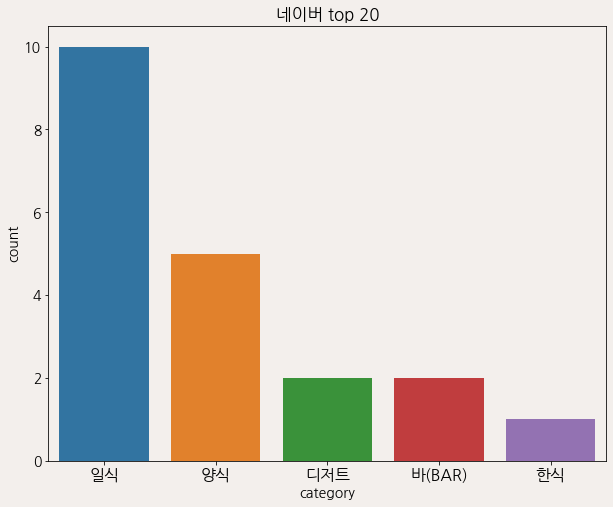

In [19]:
plt.rcParams['figure.facecolor'] = '#F3EFEC'
plt.rcParams['axes.facecolor'] = '#F3EFEC'

plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(10,8))
plt.title("네이버 top 20")
sns.barplot(x=naver_top20["category"], y=naver_top20["count"])
plt.xticks(fontsize=16)
fig.savefig('naver_top.png', transparent=True)
plt.show()

In [47]:
# 네이버 평점

query = """
SELECT id, name, rating,
CASE WHEN category = "국밥" THEN "한식"
     WHEN category = "떡볶이" THEN "한식"
     WHEN category = "곰탕,설렁탕" THEN "한식"
     WHEN category = "냉면" THEN "한식"
     WHEN category = "정육식당" THEN "한식"
     WHEN category = "닭갈비" THEN "한식"
     WHEN category = "곱창,막창,양" THEN "한식"
     WHEN category = "생선회" THEN "일식"      
     WHEN category = "초밥,롤" THEN "일식"      
     WHEN category = "일식당" THEN "일식"
     WHEN category = "피자" THEN "양식"
     WHEN category = "중식당" THEN "중식"
     WHEN category = "카페,디저트" THEN "디저트"
     ELSE category
     END AS category
FROM naver_restaurant
WHERE rating IS NOT NULL AND
      rating > 0.1
ORDER BY rating
LIMIT 20;
"""

spark.sql(query).show()
naver_restaurant_top20_df = spark.sql(query)

+---+-------------------------+------+--------+
| id|                     name|rating|category|
+---+-------------------------+------+--------+
|167|           일흥콩나물국밥|  4.16|    한식|
|219|             홍이네떡볶이|  4.16|    한식|
|215|             가고파설렁탕|  4.18|    한식|
|119|               미즐카페엠|  4.19|  디저트|
|218|                   한참치|   4.2|    일식|
|168|                   드시소|  4.26|    일식|
|230|                   춘천옥|  4.27|    한식|
|157|                 평양면옥|  4.28|    한식|
|224|             세라즈피자펍|   4.3|    양식|
|103|             신흥정육식당|  4.31|    한식|
|106|             진미한우곱창|  4.31|    한식|
|238|                   호접몽|  4.31|    중식|
|155|이스트바이게이트 신도림점|  4.32|태국음식|
|249|                   수정궁|  4.32|    중식|
|152|             월래순교자관|  4.34|    중식|
|181|                 스시이마|  4.34|    일식|
|130|               배진수스시|  4.35|    일식|
|158|          신도림 이도식당|  4.35|    한식|
|176|                   대관원|  4.35|    중식|
|220|               파크더블유|  4.35|  디저트|
+---+-------------------------+------+-----

In [48]:
temp_df = spark.sql(query).groupBy("category").count().orderBy("count", ascending=False)
naver_restaurant_bottom20_df = temp_df.select("*").toPandas()

In [49]:
naver_restaurant_bottom20_df

,category,count
0,한식,8
1,일식,4
2,중식,4
3,디저트,2
4,양식,1
5,태국음식,1


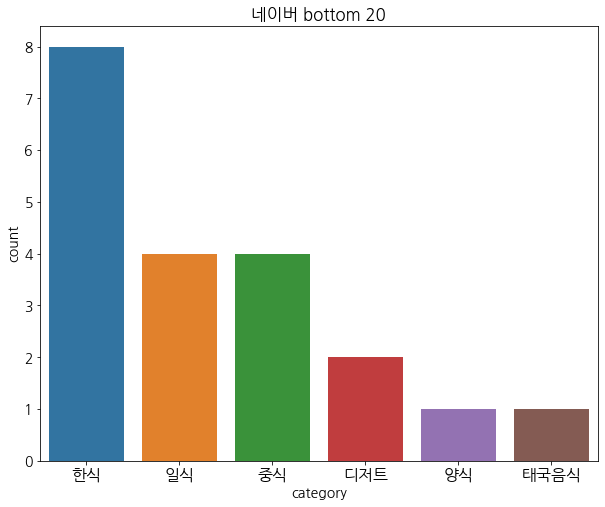

In [52]:
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(10,8))
plt.title("네이버 bottom 20")
sns.barplot(x=naver_restaurant_bottom20_df["category"], y=naver_restaurant_bottom20_df["count"])
plt.xticks(fontsize=16)
fig.savefig('naver_bottom.png', transparent=True)
plt.show()

In [30]:
query = """
SELECT CASE WHEN category = "카페 / 디저트" THEN "디저트"
     WHEN category = "베이커리" THEN "디저트"
     WHEN category = "까스 요리" THEN "일식"
     WHEN category = "회 / 스시" THEN "일식"
     WHEN category = "이자카야 / 오뎅 / 꼬치" THEN "일식"
     WHEN category = "돈부리 / 일본 카레 / 벤토" THEN "일식"
     WHEN category = "정통 일식 / 일반 일식" THEN "일식"
     WHEN category = "한정식 / 백반 / 정통 한식" THEN "한식"
     WHEN category = "고기 요리" THEN "한식"
     WHEN category = "철판 요리" THEN "일식"
     WHEN category = "세계음식 기타" THEN "양식"
     WHEN category = "기타 양식" THEN "양식"
     WHEN category = "프랑스 음식" THEN "양식"
     WHEN category = "이탈리안" THEN "양식"
     WHEN category = "스테이크 / 바베큐" THEN "양식"
     WHEN category = "브런치 / 버거 / 샌드위치" THEN "양식"
     ELSE category
     END AS category, count(*) AS CNT
FROM mango_restaurant
WHERE rating > 4.6
GROUP BY category

LIMIT 20;
"""

spark.sql(query).show()
mango_restaurant_bottom20_df = spark.sql(query)

+-------------+---+
|     category|CNT|
+-------------+---+
|칵테일 / 와인|  1|
|         일식|  1|
|         양식|  1|
|       디저트|  2|
|         한식|  1|
|         양식|  1|
|         일식|  1|
|       디저트|  2|
|         일식|  2|
|         한식|  1|
|         양식|  1|
|         일식|  2|
|         양식|  1|
|         일식|  4|
|         양식|  1|
|         양식|  1|
|         일식|  1|
+-------------+---+



In [31]:
# 네이버 평점

query = """
SELECT id, name, rating,
CASE WHEN category = "카페,디저트" THEN "디저트"
     WHEN category = "베이커리" THEN "디저트"
     WHEN category = "까스 요리" THEN "일식"
     WHEN category = "초밥,롤" THEN "일식"
     WHEN category = "일식튀김,꼬치" THEN "일식"
     WHEN category = "돈가스" THEN "일식"
     WHEN category = "일식당" THEN "일식"
     WHEN category = "정육식당" THEN "한식"
     WHEN category = "국밥" THEN "한식"
     WHEN category = "곰탕,설렁탕" THEN "한식"
     WHEN category = "곱창,막창,양" THEN "한식"
     WHEN category = "닭갈비" THEN "한식"
     WHEN category = "떡볶이" THEN "한식"
     WHEN category = "냉면" THEN "한식"
     WHEN category = "생선회" THEN "일식"
     WHEN category = "세계음식 기타" THEN "양식"
     WHEN category = "피자" THEN "양식"
     WHEN category = "프랑스음식" THEN "양식"
     WHEN category = "이탈리안" THEN "양식"
     WHEN category = "스파게티,파스타전문" THEN "양식"
     WHEN category = "정통 중식 / 일반 중식" THEN "중식"
     ELSE category
     END AS category
FROM naver_restaurant
WHERE rating IS NOT NULL
ORDER BY rating ASC
LIMIT 20;
"""

spark.sql(query).show()

+---+-------------------------+------+--------+
| id|                     name|rating|category|
+---+-------------------------+------+--------+
|167|           일흥콩나물국밥|  4.16|    한식|
|219|             홍이네떡볶이|  4.16|    한식|
|215|             가고파설렁탕|  4.18|    한식|
|119|               미즐카페엠|  4.19|  디저트|
|218|                   한참치|   4.2|    일식|
|168|                   드시소|  4.26|    일식|
|230|                   춘천옥|  4.27|    한식|
|157|                 평양면옥|  4.28|    한식|
|224|             세라즈피자펍|   4.3|    양식|
|103|             신흥정육식당|  4.31|    한식|
|106|             진미한우곱창|  4.31|    한식|
|238|                   호접몽|  4.31|  중식당|
|155|이스트바이게이트 신도림점|  4.32|태국음식|
|249|                   수정궁|  4.32|  중식당|
|152|             월래순교자관|  4.34|  중식당|
|181|                 스시이마|  4.34|    일식|
|130|               배진수스시|  4.35|    일식|
|158|          신도림 이도식당|  4.35|    한식|
|176|                   대관원|  4.35|  중식당|
|220|               파크더블유|  4.35|  디저트|
+---+-------------------------+------+--------+

In [32]:
# 구글 리뷰

query = """
SELECT id, name,  rating,
CASE WHEN category = "스시/초밥집" THEN "일식"
     WHEN category = "돈까스 전문식당" THEN "일식"
     WHEN category = "튀김 전문식당" THEN "일식"
     WHEN category = "일본 음식점" THEN "일식"
     WHEN category = "카페" THEN "디저트"
     WHEN category = "제과점" THEN "디저트"
     WHEN category = "한식당" THEN "한식"
     WHEN category = "김밥은" THEN "한식"
     WHEN category = "춘천옥" THEN "한식"
     WHEN category = "홍이네떡볶이" THEN "한식"
     WHEN category = "음식점" THEN "일식"
     WHEN category = "이탈리아 음식점" THEN "양식"
     WHEN category = "중국 음식점" THEN "중식"
     WHEN category = "프랑스 제과점" THEN "디저트"
     WHEN category = "디저트 전문 레스토랑" THEN "디저트"
     WHEN category = "에스프레소 바" THEN "디저트"
     WHEN category = "프렌치 (현대식) 레스토랑" THEN "양식"
     WHEN category = "칵테일바" THEN "바(BAR)"
     ELSE category
     END AS category
FROM google_restaurant

ORDER BY rating DESC
LIMIT 20;
"""

spark.sql(query).show()

+---+---------------------------------+------+-------------+
| id|                             name|rating|     category|
+---+---------------------------------+------+-------------+
|126|                           희희잇|   5.0|       디저트|
|178|                             오헨|   5.0|       디저트|
|210|                           시미베|   5.0|         일식|
|237|                       우애돈카츠|   5.0|         일식|
|131|따빠디또 디저트 따빠스바 (휴업중)|   4.9|       디저트|
|277|                           라바즈|   4.9|       디저트|
|133|                         베이컨시|   4.8|         양식|
|164|                         우정초밥|   4.8|         일식|
|174|             바이러닉에스프레소바|   4.8|       디저트|
|194|                         BAR CHAM|   4.8|      바(BAR)|
|250|                             겨리|   4.8|         일식|
|255|                         스시코야|   4.8|         일식|
|102|                         얌얌카츠|   4.7|         일식|
|107|                     이한진숙성회|   4.7|         일식|
|124|                       소장식물전|   4.7|       디저트|
|134| 

In [33]:
temp_df = spark.sql(query)
temp_df.groupBy("category").count().orderBy("count", ascending=False).show()
google_top20 = temp_df.groupBy("category").count().orderBy("count", ascending=False).toPandas()

+-------------+-----+
|     category|count|
+-------------+-----+
|         일식|    9|
|       디저트|    6|
|         양식|    2|
|      바(BAR)|    1|
|멕시코 음식점|    1|
|         중식|    1|
+-------------+-----+



In [34]:
google_top20

,category,count
0,일식,9
1,디저트,6
2,양식,2
3,바(BAR),1
4,멕시코 음식점,1
5,중식,1


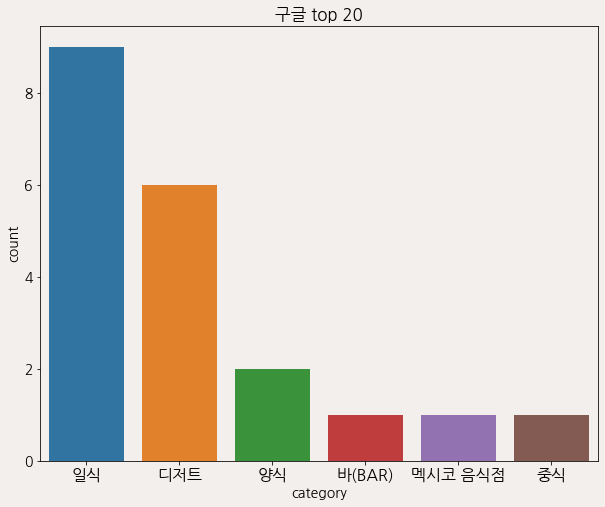

In [66]:
plt.rcParams['figure.facecolor'] = '#F3EFEC'
plt.rcParams['axes.facecolor'] = '#F3EFEC'
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['font.size'] = 14

plt.figure(figsize=(10,8))
plt.title("구글 top 20")
sns.barplot(x=google_top20["category"], y=google_top20["count"])
plt.xticks(fontsize=16)
plt.show()

In [36]:
# 구글 리뷰

query = """
SELECT id, name,  rating,
CASE WHEN category = "스시/초밥집" THEN "일식"
     
     ELSE category
     END AS category
FROM google_restaurant
WHERE rating > 0.1
ORDER BY rating ASC
LIMIT 20;
"""

spark.sql(query).show()

+---+--------------------+------+--------------------+
| id|                name|rating|            category|
+---+--------------------+------+--------------------+
|258|        홍콩중화요리|   2.5|              음식점|
|177|            히노노리|   3.7|         일본 음식점|
|117|              김밥은|   3.8|              음식점|
|158|     신도림 이도식당|   3.8|              한식당|
|230|              춘천옥|   3.8|              음식점|
|115|            동네함박|   3.9|              음식점|
|141|오코노미야키식당하나|   3.9|     돈까스 전문식당|
|155|    이스트바이게이트|   3.9|         태국 음식점|
|110|          등갈비달인|   4.0|    갈비 전문 음식점|
|130|          배진수스시|   4.0|                일식|
|160|          빈브라더스|   4.0|  커피숍/커피 전문점|
|188|            스시쇼부|   4.0|                일식|
|219|        홍이네떡볶이|   4.0|          간이음식점|
|146|            매운향솥|   4.1|         중국 음식점|
|156|          상하이포차|   4.1|         중국 음식점|
|145|            빠오즈푸|   4.1|  딤섬 전문 레스토랑|
|159|        신도림참족발|   4.1|         족발/보쌈집|
|167|      일흥콩나물국밥|   4.1|       해장국 전문점|
|175|      줘마양다리구이|   4.1|

In [37]:
temp_df = spark.sql(query).toPandas()

In [38]:
temp_sdf = spark.createDataFrame(temp_df)

In [39]:
temp_sdf.createOrReplaceTempView("google_bottom")

In [40]:
# 구글 리뷰

query = """
SELECT id, name,  rating,
CASE WHEN category = "스시/초밥집" THEN "일식"
     WHEN category = "일본 음식점" THEN "일식"
     WHEN category = "한식당" THEN "한식"
     WHEN category = "음식점" THEN "한식"
     WHEN category = "돈까스 전문식당" THEN "일식"
     WHEN category = "간이음식점" THEN "한식"
     WHEN category = "갈비 전문 음식점" THEN "한식"
     WHEN category = "커피숍/커피 전문점" THEN "디저트"
     WHEN category = "중국 음식점" THEN "중식"
     WHEN category = "딤섬 전문 레스토랑" THEN "중식"
     WHEN category = "족발/보쌈집" THEN "한식"
     WHEN category = "해장국 전문점" THEN "한식"
     WHEN category = "양고기 바베큐 전문점" THEN "양식"

     
     ELSE category
     END AS category
FROM google_bottom
WHERE rating > 0.1
ORDER BY rating ASC
LIMIT 20;
"""

spark.sql(query).show()

+---+--------------------+------+-----------+
| id|                name|rating|   category|
+---+--------------------+------+-----------+
|258|        홍콩중화요리|   2.5|       한식|
|177|            히노노리|   3.7|       일식|
|117|              김밥은|   3.8|       한식|
|158|     신도림 이도식당|   3.8|       한식|
|230|              춘천옥|   3.8|       한식|
|115|            동네함박|   3.9|       한식|
|141|오코노미야키식당하나|   3.9|       일식|
|155|    이스트바이게이트|   3.9|태국 음식점|
|219|        홍이네떡볶이|   4.0|       한식|
|110|          등갈비달인|   4.0|       한식|
|130|          배진수스시|   4.0|       일식|
|160|          빈브라더스|   4.0|     디저트|
|188|            스시쇼부|   4.0|       일식|
|146|            매운향솥|   4.1|       중식|
|145|            빠오즈푸|   4.1|       중식|
|156|          상하이포차|   4.1|       중식|
|159|        신도림참족발|   4.1|       한식|
|176|              대관원|   4.1|       중식|
|167|      일흥콩나물국밥|   4.1|       한식|
|175|      줘마양다리구이|   4.1|       양식|
+---+--------------------+------+-----------+



In [41]:
temp_df = spark.sql(query)
temp_df.groupBy("category").count().orderBy("count", ascending=False).show()
google_bottom20 = temp_df.groupBy("category").count().orderBy("count", ascending=False).toPandas()

+-----------+-----+
|   category|count|
+-----------+-----+
|       한식|    9|
|       일식|    4|
|       중식|    4|
|태국 음식점|    1|
|     디저트|    1|
|       양식|    1|
+-----------+-----+



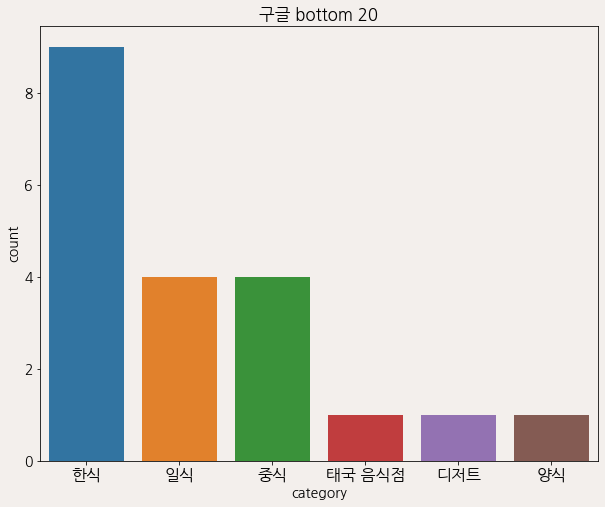

In [67]:
plt.rcParams['figure.facecolor'] = '#F3EFEC'
plt.rcParams['axes.facecolor'] = '#F3EFEC'
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['font.size'] = 14

plt.figure(figsize=(10,8))
plt.title("구글 bottom 20")
sns.barplot(x=google_bottom20["category"], y=google_bottom20["count"])
plt.xticks(fontsize=16)
plt.show()

In [71]:
query = """
SELECT mango_restaurant.id, 
       mango_restaurant.rating AS mango_rating, 
       naver_restaurant.rating AS naver_rating,
       google_restaurant.rating AS google_rating

FROM mango_restaurant
JOIN naver_restaurant
ON mango_restaurant.id = naver_restaurant.id

JOIN google_restaurant
ON google_restaurant.id = mango_restaurant.id

WHERE naver_restaurant.rating IS NOT NULL
AND google_restaurant.rating > 0.1;
"""
spark.sql(query).show()

+---+------------+------------+-------------+
| id|mango_rating|naver_rating|google_rating|
+---+------------+------------+-------------+
|101|         4.4|        4.47|          4.3|
|102|         4.4|        4.65|          4.7|
|103|         4.4|        4.31|          4.4|
|104|         4.3|        4.67|          4.5|
|105|         4.3|         4.4|          4.5|
|106|         4.3|        4.31|          4.3|
|108|         4.3|        4.59|          4.5|
|110|         4.3|        4.51|          4.0|
|111|         4.3|        4.38|          4.2|
|112|         4.3|        4.44|          4.6|
|113|         4.3|        4.48|          4.2|
|114|         4.2|         4.7|          4.4|
|115|         4.1|        4.38|          3.9|
|116|         4.1|        4.57|          4.6|
|117|         4.1|        4.42|          3.8|
|118|         4.1|        4.46|          4.5|
|119|         4.0|        4.19|          4.2|
|120|         4.0|        4.44|          4.3|
|122|         4.3|        4.42|   

In [72]:
temp_df = spark.sql(query).toPandas()
temp_df

,id,mango_rating,naver_rating,google_rating
0,101,4.4,4.47,4.3
1,102,4.4,4.65,4.7
2,103,4.4,4.31,4.4
3,104,4.3,4.67,4.5
4,105,4.3,4.40,4.5
...,...,...,...,...
139,274,4.8,4.78,4.3
140,275,4.7,4.47,4.7
141,276,4.7,4.87,4.7
142,277,4.7,4.70,4.9


In [82]:
melted_df = pd.melt(
    temp_df.reset_index(),
    id_vars=["id"],
    value_vars=["mango_rating", "naver_rating", "google_rating"])

melted_df.head()

,id,variable,value
0,101,mango_rating,4.4
1,102,mango_rating,4.4
2,103,mango_rating,4.4
3,104,mango_rating,4.3
4,105,mango_rating,4.3


In [75]:
test_df = melted_df
test_df["id"] = 1
test_df

,id,variable,value
0,1,mango_rating,4.4
1,1,mango_rating,4.4
2,1,mango_rating,4.4
3,1,mango_rating,4.3
4,1,mango_rating,4.3
...,...,...,...
427,1,google_rating,4.3
428,1,google_rating,4.7
429,1,google_rating,4.7
430,1,google_rating,4.9


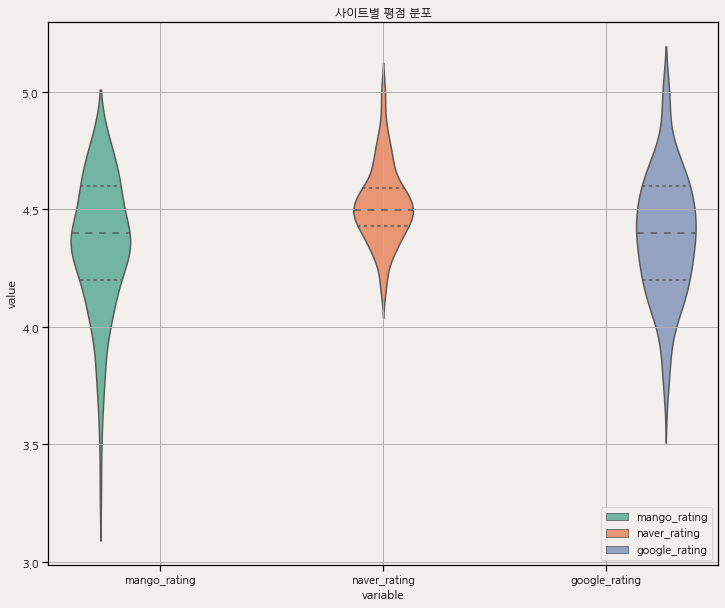

In [80]:
plt.rcParams['figure.facecolor'] = '#F3EFEC'
plt.rcParams['axes.facecolor'] = '#F3EFEC'
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['font.size'] = 14

plt.figure(figsize=(12,10))
sns.violinplot(data = test_df, y = "value", x="variable", hue="variable", palette="Set2", inner="quartile")
plt.legend(loc=4)
plt.title("사이트별 평점 분포")
plt.grid()
plt.show()

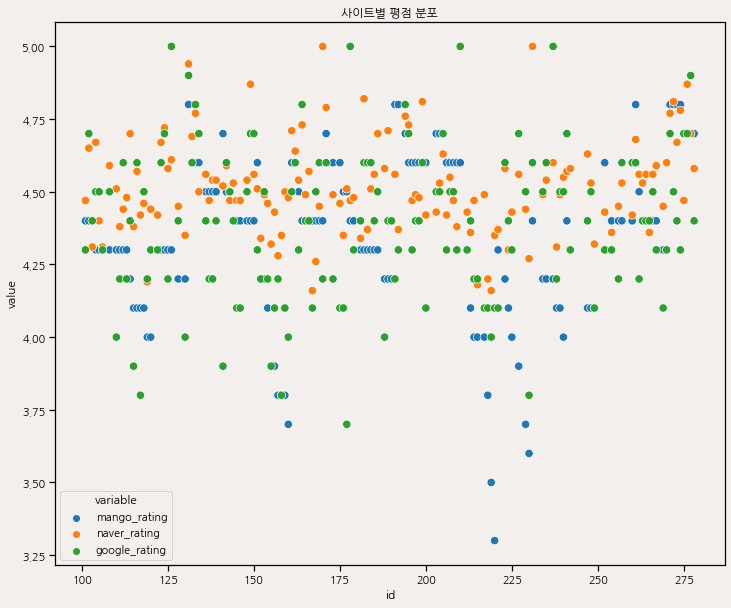

In [83]:
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(12,10))
sns.scatterplot(data = melted_df, y = "value", x="id", hue="variable", s= 70)
plt.title("사이트별 평점 분포")
fig.savefig('temp.png', transparent=True)
plt.show()

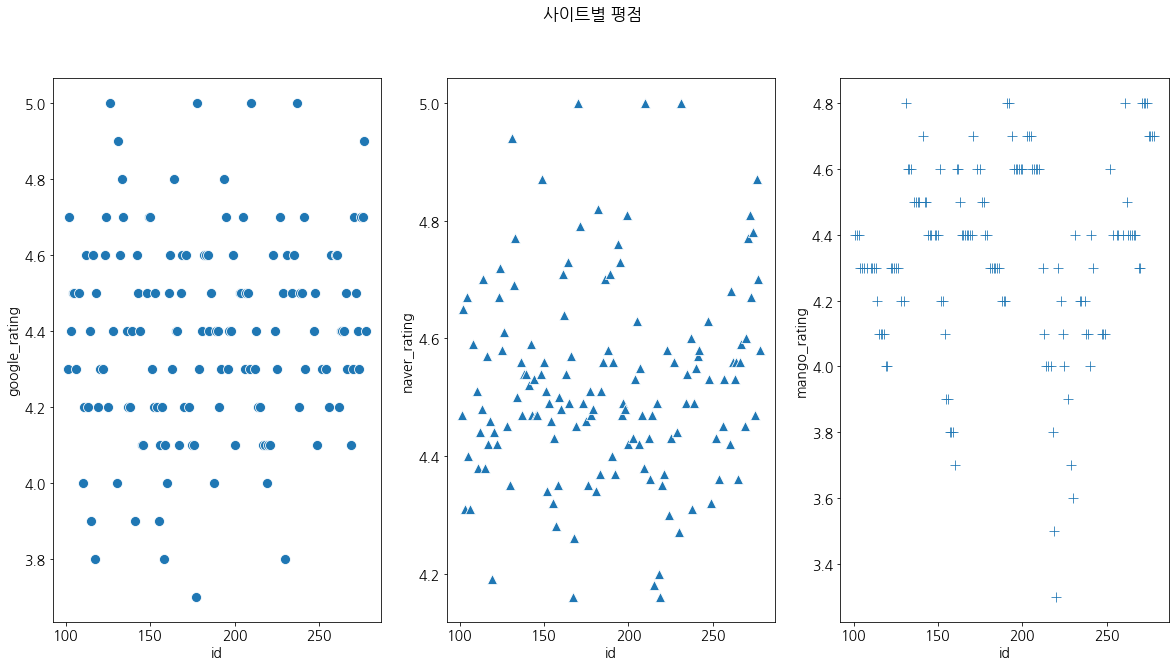

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

fig.suptitle('사이트별 평점')

sns.scatterplot(ax=axes[0], y = temp_df["google_rating"], x = temp_df["id"], s=100)
sns.scatterplot(ax=axes[1], y = temp_df["naver_rating"], x = temp_df["id"], s=100, marker="^")
sns.scatterplot(ax=axes[2], y = temp_df["mango_rating"], x = temp_df["id"], s=100, marker="+")
plt.show()